#### Select the Right Threshold values using ROC Curve

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
import seaborn as sns

In [9]:
#roc and auc curve
from sklearn.datasets import make_classification

In [12]:
from sklearn.model_selection import train_test_split
X,y=make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)

In [13]:
X.shape

(2000, 20)

In [14]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
ytrain_pred=rf_model.predict_proba(X_train)
print("RF roc auc :{}".format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred=rf_model.predict_proba(X_test)
print("RF roc auc :{} ".format(roc_auc_score(y_test,ytest_pred[:,-1])))


RF roc auc curve:1.0
RF roc auc curve:0.9842444444444445 


In [24]:
ytrain_pred

array([[1.  , 0.  ],
       [0.99, 0.01],
       [0.01, 0.99],
       ...,
       [0.96, 0.04],
       [0.99, 0.01],
       [0.33, 0.67]])

#### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train,y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


#### Adaboost Classifier

In [30]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train,y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('AdaBoost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('AdaBoost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))


AdaBoost train roc-auc: 0.9975081174960356
AdaBoost test roc-auc: 0.9826111111111111


#### KNN Classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier
kn_classifier=KNeighborsClassifier()
kn_classifier.fit(X_train,y_train)
ytrain_pred = kn_classifier.predict_proba(X_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = kn_classifier.predict_proba(X_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

KNN train roc-auc: 0.981670071491109
KNN test roc-auc: 0.9426111111111111


#### No we will focus on selecting the best threshold for maximum accuracy

In [32]:
pred=[]
for model in[rf_model,log_classifier,ada_classifier,kn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print("ensemble roc auc :{}".format(roc_auc_score(y_test,final_prediction)))


ensemble roc auc curve:0.9851


In [33]:
pd.concat(pred,axis=1)

,0,1,2,3
0,1.00,0.991861,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.96,0.966929,0.538202,0.8
3,0.94,0.761539,0.509875,0.8
4,0.57,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.02,0.000003,0.441377,0.0
597,0.97,0.984385,0.532403,1.0
598,0.00,0.001147,0.441720,0.2


In [34]:
final_prediction

0      0.887762
1      0.115823
2      0.816283
3      0.752853
4      0.559947
         ...   
595    0.121340
596    0.115345
597    0.871697
598    0.160717
599    0.837357
Length: 600, dtype: float64

In [35]:
#calclute the Roc curve

fpr,tpr,thersholds=roc_curve(y_test,final_prediction)

In [36]:
thersholds

array([1.91188114, 0.91188114, 0.90674686, 0.90577475, 0.80306516,
       0.8030558 , 0.8019465 , 0.80162833, 0.78567698, 0.78071156,
       0.7583411 , 0.75787124, 0.72708108, 0.72637362, 0.70038086,
       0.69643711, 0.65537883, 0.64243537, 0.61988185, 0.60614346,
       0.59529968, 0.59300386, 0.58406376, 0.58175354, 0.57577749,
       0.57236186, 0.55994674, 0.55719563, 0.55042732, 0.54877948,
       0.53865858, 0.50616892, 0.44919266, 0.37684818, 0.37629719,
       0.34933098, 0.34836612, 0.24947787, 0.24640421, 0.23448424,
       0.23396893, 0.20438001, 0.20098417, 0.12053605, 0.1203351 ,
       0.10695344])

In [40]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thersholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thersholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thersholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()
    

,thersholds,accuracy
32,0.449193,0.961667
31,0.506169,0.958333
30,0.538659,0.958333
29,0.548779,0.956667
28,0.550427,0.955000


In [41]:
accuracy_ls

,thersholds,accuracy
32,0.449193,0.961667
31,0.506169,0.958333
30,0.538659,0.958333
29,0.548779,0.956667
28,0.550427,0.955000
27,0.557196,0.955000
26,0.559947,0.953333
23,0.581754,0.950000
25,0.572362,0.950000
22,0.584064,0.948333


In [43]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='green',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


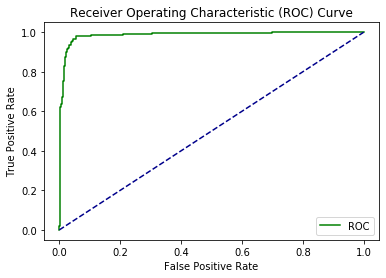

In [44]:
plot_roc_curve(fpr,tpr)